In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm
import uproot
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
from pylab import rcParams
plt.rcParams.update({'font.size': 18})



from root_numpy import root2array
from scipy.interpolate import interp1d
from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
folder = "gamma3d"
folder_corr= 'gammacorrelation'
folder_truth='TruthStudies'
TREE_CLUSTER = "Clustertree"
TREE_MATCHING = "Matchingtree"
TREE_SPS="Sps_Correlationtree"
TREE_EVENT="Event_Correlationtree"
TREE_EVENT_TRUTH="Eventtree"
TREE_MCPARTICLE_TRUTH="MCParticletree"
TREE_HIT="Hittree"

In [4]:
CLEAN_REGION = 'Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600)'
MATCH_CUT='Y_cluster_3d_hit_y > -120.0 and Y_cluster_3d_hit_y < 120.0'

In [5]:
# cluster_track_file_prod_electron='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_electron_0.0-3MeV_clustertrackdistance_hadd_primary_bktrk.root'
# truth_studies_file_prod_electron='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_electron_0.0-3MeV_truthstudies_bktrk_primary_hadd.root'

#1-5 MeV 0 Sigma Angles 0 Spread
# cluster_track_file_prod_electron='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_electron_0.0-3MeV_clustertrk_bktrk_primary_0sigmaangles_hadd.root'
# truth_studies_file_prod_electron='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_electron_0.0-3MeV_truthstudies_bktrk_primary_0sigmaangles_hadd.root'

# 1-5 MeV Non Zero Sigma Angle Full detector Spread
# cluster_track_file_prod_electron='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_gamma_0.0-3MeV_clustrtrk_bktrk_spread_hadd.root'
# truth_studies_file_prod_electron='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_gamma_0.0-3MeV_truthstudies_bktrk_spread_hadd.root'

# 0-5 MeV Non Zero Sigma Angle Full detector Spread
# cluster_track_file_prod_electron='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_electron_0.0-3MeV_clustrtrk_bktrk_primary_fullspread_hadd.root'
# truth_studies_file_prod_electron='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_electron_0.0-3MeV_truthstudies_bktrk_primary_fullspread_hadd.root'


# 0-5 MeV Non Zero Sigma Angle BOUNDARY detector Spread
cluster_track_file_prod_electron='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_electron_0.0-3MeV_clustrtrk_bktrk_primary_spreadboundary_hadd.root'
truth_studies_file_prod_electron='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_electron_0.0-3MeV_truthstudies_bktrk_primary_spreadboundary_hadd.root'




# # 0-5 MeV Zero Sigma Angle 20cm detector Spread
# cluster_track_file_prod_electron='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_electron_0.0-3MeV_clustrtrk_bktrk_primary_spread20_hadd.root'
# truth_studies_file_prod_electron='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_electron_0.0-3MeV_truthstudies_bktrk_primary_spread20_hadd.root'





In [6]:
Cluster_tree_prod_electron = uproot.open(cluster_track_file_prod_electron)[folder][TREE_CLUSTER]
Matching_tree_prod_electron = uproot.open(cluster_track_file_prod_electron)[folder][TREE_MATCHING]
Sps_tree_prod_electron=uproot.open(truth_studies_file_prod_electron)[folder_truth][TREE_SPS]


Event_tree_prod_electron_truth=uproot.open(truth_studies_file_prod_electron)[folder_truth][TREE_EVENT_TRUTH]
MCParticle_tree_prod_electron_truth=uproot.open(truth_studies_file_prod_electron)[folder_truth][TREE_MCPARTICLE_TRUTH]
Hit_tree_prod_electron_truth=uproot.open(truth_studies_file_prod_electron)[folder_truth][TREE_HIT]

In [7]:
df_Matching_prod_electron=Matching_tree_prod_electron.pandas.df().query(CLEAN_REGION)

#df_Matching_prod_electron=Matching_tree_prod_electron.pandas.df()

df_Cluster_prod_electron=Cluster_tree_prod_electron.pandas.df()

df_Correlation_prod_electron_Sps=Sps_tree_prod_electron.pandas.df()

df_Event_tree_prod_electron=Event_tree_prod_electron_truth.pandas.df()

df_MCParticle_tree_prod_electron=MCParticle_tree_prod_electron_truth.pandas.df()

df_Hit_tree_prod_electron=Hit_tree_prod_electron_truth.pandas.df()

In [8]:
electron_mass=0.7

In [9]:
df_Matching_prod_electron.head()

,V_biggest_iou,V_match_multiplicity,U_biggest_iou,U_match_multiplicity,Y_clus_lifetime,Y_clus_hitSize,V_clus_hitSize,U_clus_hitSize,Y_cluster_3d_hit_z,Y_cluster_3d_hit_x,...,YU_iou,deltaY,deltaY_smallest,Y_Wire,start_tick_cluster0,start_tick_cluster1,start_tick_cluster2,end_tick_cluster0,end_tick_cluster1,end_tick_cluster2
entry,,,,,,,,,,,,,,,,,,,,,
0,0.368264,7,0.421310,2,7.471191,3.0,-2.670417e-82,7.699631e-316,447.599999,176.484648,...,0.421310,145.319063,0.173205,1494,7.869831e-316,7.869874e-316,1.630417e-322,7.869833e-316,5.533535e-322,6.324040e-322
5,0.765123,2,0.437365,1,13.718506,3.0,1.000000e+00,1.000000e+00,462.899999,17.873674,...,0.437365,-0.173205,0.173205,1545,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,0.294223,2,-1.000000,0,6.000000,1.0,1.000000e+00,1.000000e+00,536.999999,186.399587,...,-1.000000,-9999.000000,0.173205,1790,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,0.962810,2,0.623145,1,11.991455,5.0,1.000000e+00,1.000000e+00,498.899999,98.088448,...,0.623145,0.519615,0.519615,1667,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10,0.914226,2,0.976439,1,6.144775,2.0,1.000000e+00,1.000000e+00,565.199999,101.622261,...,0.976439,-0.173205,0.173205,1885,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [10]:
df_Cluster_prod_electron.head()

,cluster_hit_z,cluster_hit_x,Z_reco_best,X_reco_best,distance_smallest,plane
entry,,,,,,
0,196.5,99.345009,0.000000,0.000000,1.000000e+10,0
1,196.5,99.345009,448.199890,177.645203,1.783478e+02,0
2,201.9,9.193333,448.199890,177.645203,1.000000e+10,0
3,201.9,9.193333,448.234894,177.110443,2.287272e+02,0
4,204.6,142.965820,448.234894,177.110443,1.000000e+10,0


In [11]:
df_Correlation_prod_electron_Sps.head()

,evttime,sps_x,sps_y,sps_z,sps_ADC_U,sps_ADC_V,sps_ADC_Y,N_Event,N_Run,N_SubRun,neutrinos,neutrinoshowers,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,bktrkd_particle_energy_per_sps
entry,,,,,,,,,,,,,,,,,,
0,372929397,176.548004,-36.442299,447.984802,131.743500,106.820145,105.520050,10021,1,1003,0,0,0,0.0,1.303208e-43,0.0,0.0,0.0
1,372929397,216.878281,94.673950,386.361511,167.267578,151.551941,173.424835,10022,1,1003,0,0,0,0.0,1.303208e-43,0.0,0.0,0.0
2,372929397,80.444763,-21.893070,190.881943,35.904060,37.452755,50.145683,10023,1,1003,0,0,0,0.0,1.303208e-43,0.0,0.0,0.0
3,372929397,41.669842,-32.978195,240.641983,207.304153,178.030853,215.657471,10024,1,1003,0,0,0,0.0,1.303208e-43,0.0,0.0,0.0
4,372929397,149.257599,-58.612549,788.752380,166.589737,149.908539,179.219589,10025,1,1003,0,0,0,0.0,1.303208e-43,0.0,0.0,0.0


In [12]:
df_Event_tree_prod_electron.head()

,Event_Energy_total_MeV,Event_Energy_total_pr,evttime,N_sps,Event_sps_ADC_U,Event_sps_ADC_V,Event_sps_ADC_Y,neutrinos,neutrinoshowers,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,N_Run,N_SubRun,N_total_e,N_total_pr_e,endprocess,process
entry,,,,,,,,,,,,,,,,,,,,
0,1.575383,1.575383,372929397,1,131.743500,106.820145,105.520050,0,0,0,0.0,1.303208e-43,0.0,0.0,1,1003,1,1,FastScintillation,primary
1,2.251152,2.251152,372929397,1,167.267578,151.551941,173.424835,0,0,0,0.0,1.303208e-43,0.0,0.0,1,1003,1,1,FastScintillation,primary
2,1.116581,1.116581,372929397,1,35.904060,37.452755,50.145683,0,0,0,0.0,1.303208e-43,0.0,0.0,1,1003,1,1,FastScintillation,primary
3,2.631762,2.631762,372929397,1,207.304153,178.030853,215.657471,0,0,0,0.0,1.303208e-43,0.0,0.0,1,1003,1,1,FastScintillation,primary
4,2.291035,2.291035,372929397,1,166.589737,149.908539,179.219589,0,0,0,0.0,1.303208e-43,0.0,0.0,1,1003,1,1,FastScintillation,primary


In [13]:
df_Hit_tree_prod_electron.head()
print len (df_Hit_tree_prod_electron)

54445


In [14]:
# df_backtracked_hit=df_Hit_tree_prod_electron.query('bktrkd_particle_energy !=0')
# df_backtracked_hit.head()
# print len(df_backtracked_hit)

In [15]:
# fig = plt.figure(figsize=(8,6))

# BINS = np.linspace(0,300,300)

# plt.hist(df_Hit_tree_prod_electron['hit_ADC_U_sum'].values,bins=BINS,histtype='step',lw=2,label='Hit ADC ')
# #plt.hist(df_Hit_tree_prod_electron['bktrkd_particle_energy'].values,bins=BINS,histtype='step',lw=2,label='Gamma')
# plt.title("Hit ADC Sum (U Plane)")
# plt.xlabel('ADC')
# plt.ylabel('Entries')
# plt.grid()
# plt.legend(loc=1)
# plt.show()

In [16]:
# fig = plt.figure(figsize=(8,6))

# BINS = np.linspace(0,5,100)

# #plt.hist(df_Hit_tree_prod_electron['hit_ADC_U_sum'].values,bins=BINS,histtype='step',lw=2,label='Hit ADC ')
# plt.hist(df_backtracked_hit['bktrkd_particle_energy'].values,bins=BINS,histtype='step',lw=2,label='Gamma')
# plt.title("Backtracked particle true energy")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Entries')
# plt.grid()
# #plt.legend(loc=1)
# plt.show()

In [17]:
df_Event_tree_prod_one_sps= df_Event_tree_prod_electron.query('N_sps==1')
df_Event_tree_prod_two_sps= df_Event_tree_prod_electron.query('N_sps==2')
df_Event_tree_prod_mul_sps= df_Event_tree_prod_electron.query('N_sps>1')


In [18]:
# #df[df['name'].str.contains('Morris', na=False)]
# print df_Event_tree_prod_electron.shape[0]
# # df_test_no=df_Event_tree_prod_electron[~df_Event_tree_prod_electron['endprocess'].str.contains('FastScintillation', na=False)]

# # df_test=df_Event_tree_prod_electron[df_Event_tree_prod_electron['endprocess'].str.contains('FastScintillation', na=False)]

# df_test_no=df_Event_tree_prod_electron[~df_Event_tree_prod_electron['process'].str.contains('primary', na=False)]

# df_test=df_Event_tree_prod_electron[df_Event_tree_prod_electron['process'].str.contains('primary', na=False)]

# print df_test.shape[0]
# print df_test_no.shape[0]

In [19]:
#electron mass =electron_mass MeV
df_Event_tree_prod_one_electron= df_Event_tree_prod_electron.query('N_total_e==1')
df_Event_tree_prod_one_electron['Event_Energy_total_MeV']= df_Event_tree_prod_one_electron['Event_Energy_total_MeV'] - electron_mass

df_Event_tree_prod_grt_one_electron = df_Event_tree_prod_electron.query('N_total_e>1')
df_Event_tree_prod_grt_one_electron['Event_Energy_total_MeV']= df_Event_tree_prod_grt_one_electron['Event_Energy_total_MeV'] - electron_mass

df_Correlation_prod_electron_Sps['bktrkd_particle_energy_per_sps']=df_Correlation_prod_electron_Sps['bktrkd_particle_energy_per_sps'] - electron_mass

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


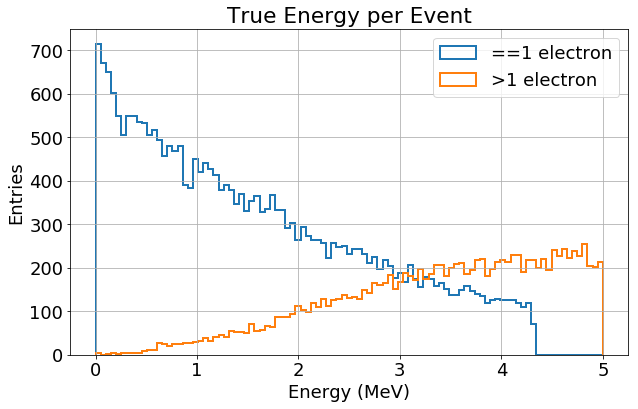

In [20]:
# print df_Event_tree_prod_electron['Event_Energy_total']
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,5,100)

plt.hist(df_Event_tree_prod_one_electron['Event_Energy_total_MeV'].values,bins=BINS,histtype='step',lw=2,label='==1 electron')
plt.hist(df_Event_tree_prod_grt_one_electron['Event_Energy_total_MeV'].values,bins=BINS,histtype='step',lw=2,label='>1 electron')


plt.title("True Energy per Event")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=1)
plt.show()
fig.savefig('True_electron_comparison_energy_per_event_check.png', dpi=300)
#print df_Event_tree_prod_electron['Event_Energy_total_MeV'].shape[0]
# print df_Event_tree_prod_electron['Event_Energy_total_MeV']
# df_Event_tree_prod_electron['Event_Energy_total_MeV'].mode()

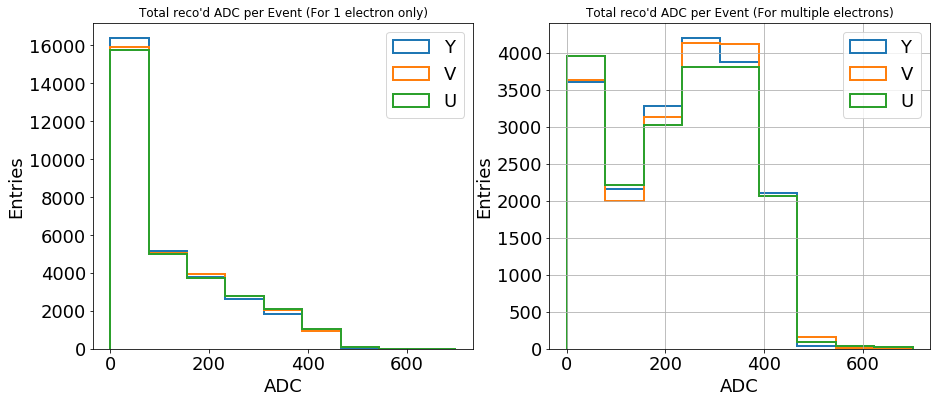

In [21]:
# print df_Event_tree_prod_electron['Event_Energy_total_MeV']
fig = plt.figure(figsize=(15,6))
BINS = np.linspace(0,700,10)
plt.subplot(1, 2, 1)
plt.hist(df_Event_tree_prod_one_electron['Event_sps_ADC_Y'].values,bins=BINS,histtype='step',lw=2,label='Y')
plt.hist(df_Event_tree_prod_one_electron['Event_sps_ADC_V'].values,bins=BINS,histtype='step',lw=2,label='V')
plt.hist(df_Event_tree_prod_one_electron['Event_sps_ADC_U'].values,bins=BINS,histtype='step',lw=2,label='U')
plt.xlabel('ADC')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.title("Total reco'd ADC per Event (For 1 electron only)",fontsize=12)
plt.subplot(1, 2, 2)
plt.hist(df_Event_tree_prod_grt_one_electron['Event_sps_ADC_Y'].values,bins=BINS,histtype='step',lw=2,label='Y')
plt.hist(df_Event_tree_prod_grt_one_electron['Event_sps_ADC_V'].values,bins=BINS,histtype='step',lw=2,label='V')
plt.hist(df_Event_tree_prod_grt_one_electron['Event_sps_ADC_U'].values,bins=BINS,histtype='step',lw=2,label='U')
plt.title("Total reco'd ADC per Event (For multiple electrons)",fontsize=12)
plt.xlabel('ADC')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=1)
plt.show()
#print df_Event_tree_prod_electron['Event_sps_ADC'].shape[0]

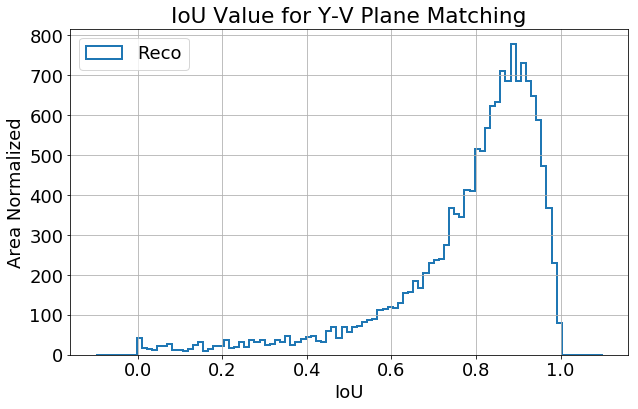

In [22]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,1.1,100)

plt.hist(df_Matching_prod_electron['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='Reco')


plt.title("IoU Value for Y-V Plane Matching")
plt.xlabel('IoU') 
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=2)
plt.show()

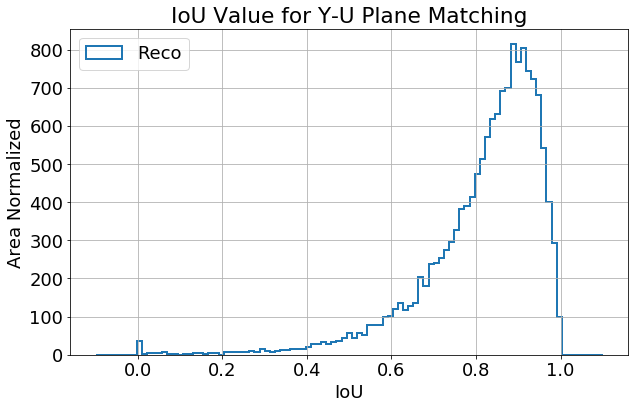

In [23]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,1.1,100)

plt.hist(df_Matching_prod_electron['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='Reco')


plt.title("IoU Value for Y-U Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=2)
plt.show()

In [24]:
df_MCParticle_tree_prod_electron.head()

,MC_Particle_Energy,position_X,position_Y,position_Z,pdg_particle,endprocess,process
entry,,,,,,,
0,1.575383,172.466949,-37.525050,448.256910,11,FastScintillation,primary
1,2.251152,215.102356,102.306935,386.607170,11,FastScintillation,primary
2,1.116581,77.709396,-21.366957,191.220105,11,FastScintillation,primary
3,2.631762,39.943954,-32.704609,241.313517,11,FastScintillation,primary
4,2.291035,146.184311,-61.159098,789.203048,11,FastScintillation,primary


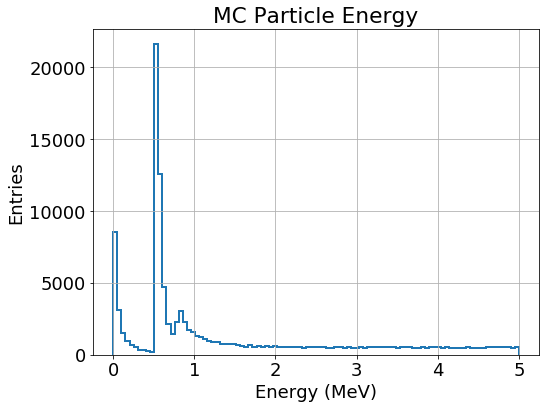

In [25]:
fig = plt.figure(figsize=(8,6))

BINS = np.linspace(0,5,100)

plt.hist(df_MCParticle_tree_prod_electron['MC_Particle_Energy'].values,bins=BINS,histtype='step',lw=2)

plt.title("MC Particle Energy")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
plt.show()

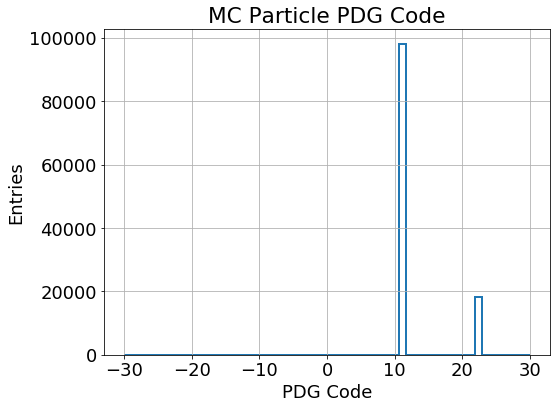

In [26]:
fig = plt.figure(figsize=(8,6))

BINS = np.linspace(-30,30,60)

plt.hist(df_MCParticle_tree_prod_electron['pdg_particle'].values,bins=BINS,histtype='step',lw=2)

plt.title("MC Particle PDG Code")
plt.xlabel('PDG Code')
plt.ylabel('Entries')
plt.grid()
plt.show()
fig.savefig('pdg.png', dpi=300)

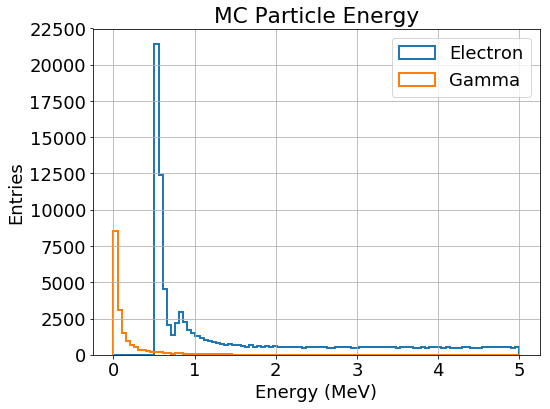

In [27]:
df_MCParticle_tree_prod_electron_11=df_MCParticle_tree_prod_electron.query('pdg_particle==11')
df_MCParticle_tree_prod_electron_22=df_MCParticle_tree_prod_electron.query('pdg_particle==22')
# df_MCParticle_tree_prod_electron_11['MC_Particle_Energy']=df_MCParticle_tree_prod_electron_11['MC_Particle_Energy']-electron_mass
# df_MCParticle_tree_prod_electron_22['MC_Particle_Energy']=df_MCParticle_tree_prod_electron_22['MC_Particle_Energy']-electron_mass

fig = plt.figure(figsize=(8,6))

BINS = np.linspace(0,5,100)

plt.hist(df_MCParticle_tree_prod_electron_11['MC_Particle_Energy'].values,bins=BINS,histtype='step',lw=2,label='Electron')
plt.hist(df_MCParticle_tree_prod_electron_22['MC_Particle_Energy'].values,bins=BINS,histtype='step',lw=2,label='Gamma')
plt.title("MC Particle Energy")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=1)
plt.show()

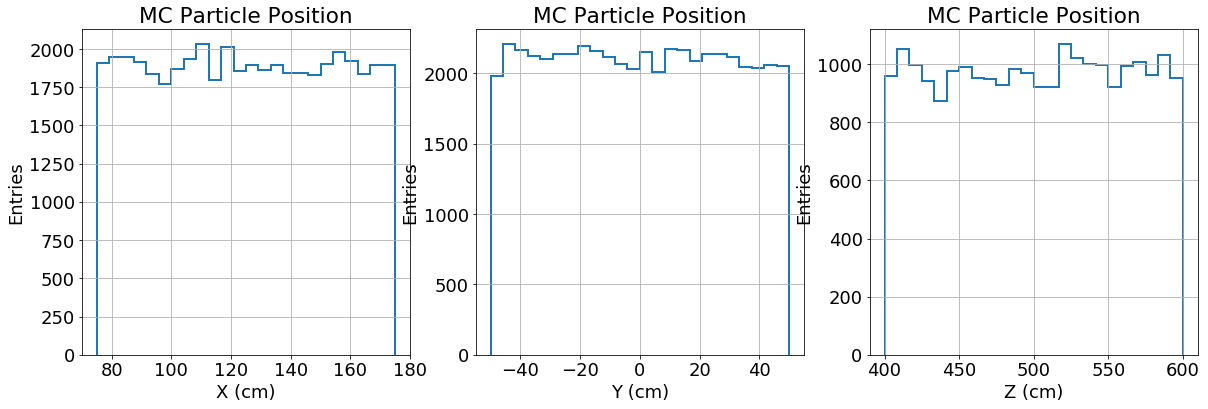

116148


In [28]:
fig = plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
BINS = np.linspace(75,175,25)

plt.hist(df_MCParticle_tree_prod_electron['position_X'].values,bins=BINS,histtype='step',lw=2)

plt.title("MC Particle Position")
plt.xlabel('X (cm)')
plt.ylabel('Entries')
plt.grid()
# plt.legend(loc=2)
plt.subplot(1, 3, 2)
BINS = np.linspace(-50,50,25)

plt.hist(df_MCParticle_tree_prod_electron['position_Y'].values,bins=BINS,histtype='step',lw=2)

plt.title("MC Particle Position")
plt.xlabel('Y (cm)')
plt.ylabel('Entries')
plt.grid()

plt.subplot(1, 3, 3)
BINS = np.linspace(400,600,25)

plt.hist(df_MCParticle_tree_prod_electron['position_Z'].values,bins=BINS,histtype='step',lw=2)

plt.title("MC Particle Position")
plt.xlabel('Z (cm)')
plt.ylabel('Entries')
plt.grid()
plt.show()
print df_MCParticle_tree_prod_electron.shape[0]

116148
50000
66148


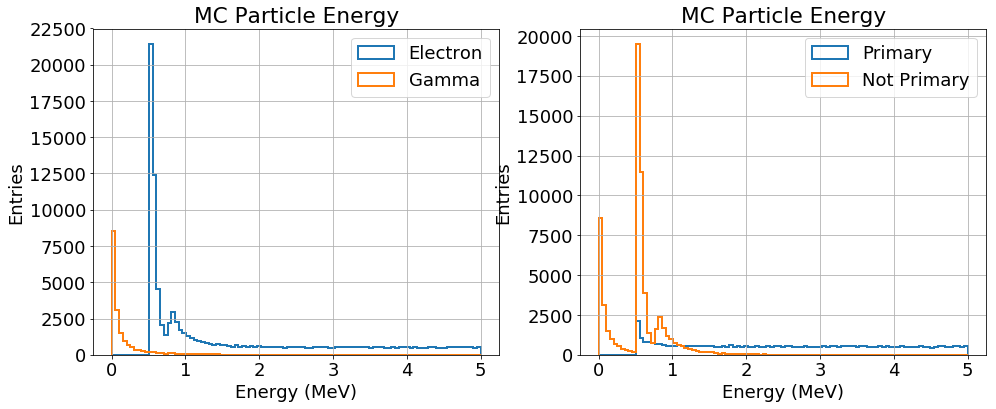

In [29]:
print df_MCParticle_tree_prod_electron.shape[0]
df_MC_test_no=df_MCParticle_tree_prod_electron[~df_MCParticle_tree_prod_electron['process'].str.contains('primary', na=False)]

df_MC_test=df_MCParticle_tree_prod_electron[df_MCParticle_tree_prod_electron['process'].str.contains('primary', na=False)]
print df_MC_test.shape[0]
print df_MC_test_no.shape[0]


df_MCParticle_tree_prod_electron_11=df_MCParticle_tree_prod_electron.query('pdg_particle==11')
df_MCParticle_tree_prod_electron_22=df_MCParticle_tree_prod_electron.query('pdg_particle==22')
# df_MCParticle_tree_prod_electron_11['MC_Particle_Energy']=df_MCParticle_tree_prod_electron_11['MC_Particle_Energy']-electron_mass
# df_MCParticle_tree_prod_electron_22['MC_Particle_Energy']=df_MCParticle_tree_prod_electron_22['MC_Particle_Energy']-electron_mass

fig = plt.figure(figsize=(16,6))

BINS = np.linspace(0,5,100)

plt.subplot(1, 2, 1)
plt.hist(df_MCParticle_tree_prod_electron_11['MC_Particle_Energy'].values,bins=BINS,histtype='step',lw=2,label='Electron')
plt.hist(df_MCParticle_tree_prod_electron_22['MC_Particle_Energy'].values,bins=BINS,histtype='step',lw=2,label='Gamma')
plt.title("MC Particle Energy")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=1)

plt.subplot(1, 2, 2)
plt.hist(df_MC_test['MC_Particle_Energy'].values,bins=BINS,histtype='step',lw=2,label='Primary')
plt.hist(df_MC_test_no['MC_Particle_Energy'].values,bins=BINS,histtype='step',lw=2,label='Not Primary')
plt.title("MC Particle Energy")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=1)
plt.show()
fig.savefig('breakdown.png', dpi=300)

In [30]:
# df_Matching_prod_electron_match=df_Matching_prod_electron.query(MATCH_CUT)
# df_Matching_prod_electron_3tick_match=df_Matching_prod_electron_3tick.query(MATCH_CUT)
df_Matching_prod_electron_match=df_Matching_prod_electron.query(MATCH_CUT)
# df_Matching_prod_electron_1tick_corrected_match=df_Matching_prod_electron_1tick_corrected.query(MATCH_CUT)

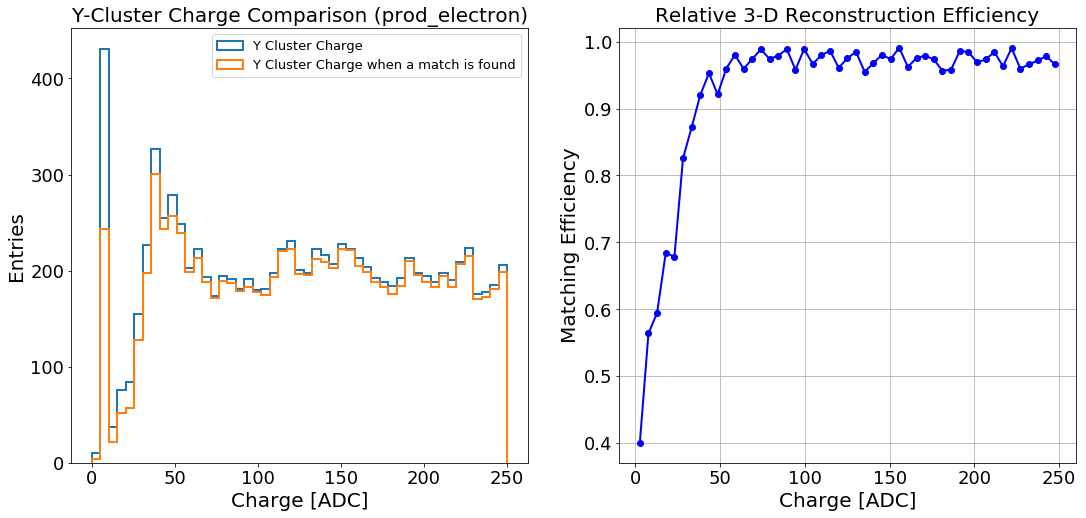

In [31]:
fig = plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)

BINS = np.linspace(0,250,50)
plt.hist(df_Matching_prod_electron['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_prod_electron_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (prod_electron)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(0,250,50)

vals2D_prod_electron, bins2D_prod_electron = np.histogram(df_Matching_prod_electron['Y_cluster_charge'].values,bins=BINS)
vals3D_prod_electron, bins3D_prod_electron = np.histogram(df_Matching_prod_electron_match['Y_cluster_charge'].values,bins=BINS)
binC_prod_electron = 0.5*(bins2D_prod_electron[1:]+bins2D_prod_electron[:-1])
vals2D_prod_electron = vals2D_prod_electron.astype(float)
#print vals2D
vals3D_prod_electron = vals3D_prod_electron.astype(float)
ratio_v_prod_electron = []
for i,v in enumerate(vals2D_prod_electron):
    if (v == 0):
        ratio_v_prod_electron.append(0.)
    else:
        ratio_v_prod_electron.append(vals3D_prod_electron[i]/v)
#print ratio_v
plt.plot(binC_prod_electron,ratio_v_prod_electron,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('Relative 3-D Reconstruction Efficiency',fontsize=20)

plt.show()


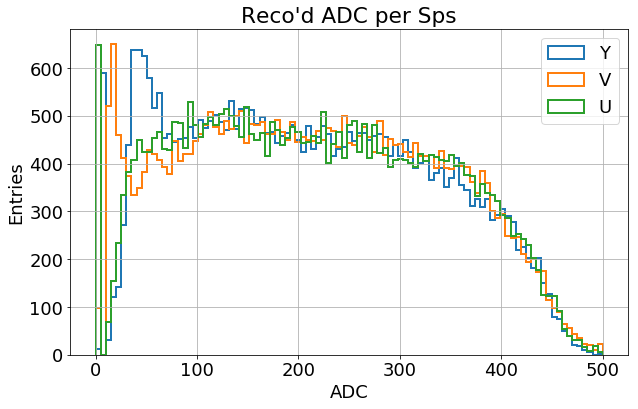

In [32]:
# print df_Event_tree_prod_electron['Event_Energy_total_MeV']
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,500,100)

plt.hist(df_Correlation_prod_electron_Sps['sps_ADC_Y'].values,bins=BINS,histtype='step',lw=2,label='Y')
plt.hist(df_Correlation_prod_electron_Sps['sps_ADC_V'].values,bins=BINS,histtype='step',lw=2,label='V')
plt.hist(df_Correlation_prod_electron_Sps['sps_ADC_U'].values,bins=BINS,histtype='step',lw=2,label='U')
plt.title("Reco'd ADC per Sps")
plt.xlabel('ADC')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=1)
plt.show()
#print df_Event_tree_prod_electron['Event_sps_ADC'].shape[0]

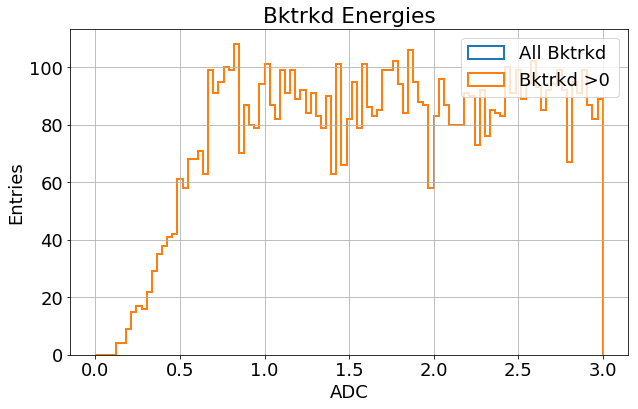

In [33]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,3,100)

plt.hist(df_Correlation_prod_electron_Sps['bktrkd_particle_energy_per_sps'].values,bins=BINS,histtype='step',lw=2,label='All Bktrkd ')
df_Correlation_prod_electron_Sps_valid= df_Correlation_prod_electron_Sps.query('bktrkd_particle_energy_per_sps >0')
plt.hist(df_Correlation_prod_electron_Sps_valid['bktrkd_particle_energy_per_sps'].values,bins=BINS,histtype='step',lw=2,label='Bktrkd >0')

plt.title("Bktrkd Energies")
plt.xlabel('ADC')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=1)
plt.show()

In [34]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

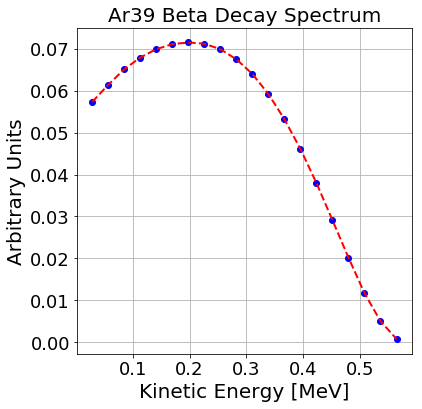

In [35]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

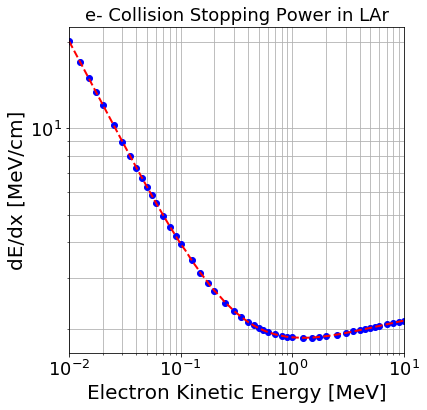

In [36]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

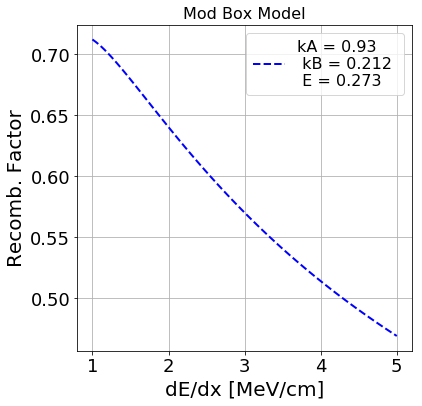

In [37]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

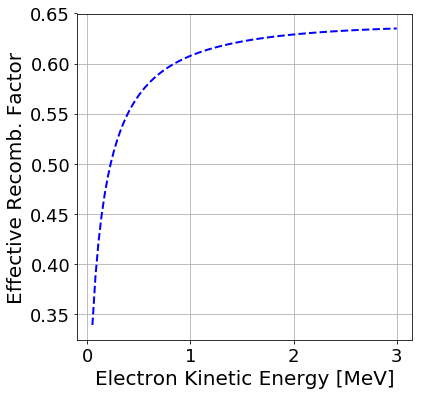

In [38]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



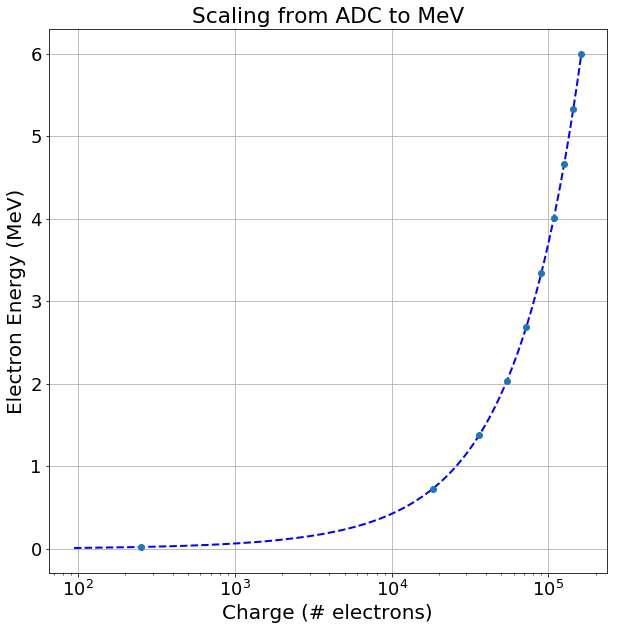

In [39]:
fig = plt.figure(figsize=(10,10))
#Evals = np.linspace(0.05,5,100)
Evals = np.linspace(0.01,6,500)
Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic',fill_value="extrapolate")
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
#plt.yscale('log')
plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
fig.savefig('Q2E.png', dpi=300)
# print (fQ2E(QrecoY_prod_electron))

In [40]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.237397584881


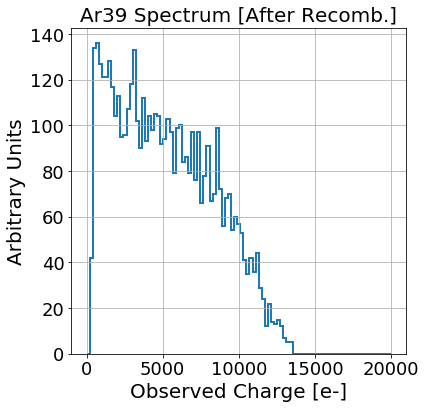

In [41]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [42]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

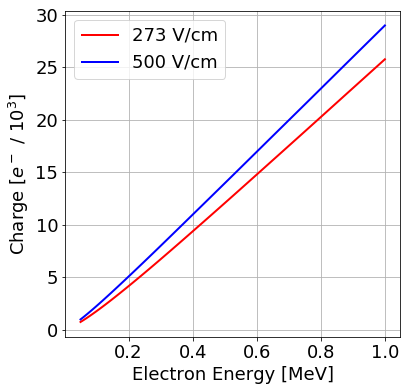

In [43]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [44]:

def E_recoY_prod_electron(df,gain):
    YQ_prod_electron = df['Y_cluster_charge']
    QrecoY_prod_electron = YQ_prod_electron * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_prod_electron = fQ2E(QrecoY_prod_electron)
    return ErecoY_prod_electron


def E_recoU_prod_electron(df,gain):
    UQ_prod_electron = df['U_cluster_charge']
    QrecoU_prod_electron = UQ_prod_electron * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_prod_electron = fQ2E(QrecoU_prod_electron)
    return ErecoU_prod_electron



def E_recoV_prod_electron(df,gain):
    VQ_prod_electron = df['V_cluster_charge']
    QrecoV_prod_electron = VQ_prod_electron * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_prod_electron = fQ2E(QrecoV_prod_electron)
    return ErecoV_prod_electron


def E_sps_event(df,gain):
    Q_sps_event = df['Event_sps_ADC_Y']
    Qreco_sps_event = Q_sps_event * gain #* (23.6/1e6) # MeV w/ no recomb factor
    Ereco_sps_event = fQ2E(Qreco_sps_event)
    return Ereco_sps_event

def E_sps_Y(df,gain):
    Q_sps_Y = df['sps_ADC_Y']
    Qreco_sps_Y = Q_sps_Y * gain #* (23.6/1e6) # MeV w/ no recomb factor
    Ereco_sps_Y = fQ2E(Qreco_sps_Y)
    return Ereco_sps_Y

def E_sps_V(df,gain):
    Q_sps_V = df['sps_ADC_V']
    Qreco_sps_V = Q_sps_V * gain #* (23.6/1e6) # MeV w/ no recomb factor
    Ereco_sps_V = fQ2E(Qreco_sps_V)
    return Ereco_sps_V

def E_sps_U(df,gain):
    Q_sps_U = df['sps_ADC_U']
    Qreco_sps_U = Q_sps_U * gain #* (23.6/1e6) # MeV w/ no recomb factor
    Ereco_sps_U = fQ2E(Qreco_sps_U)
    return Ereco_sps_U

In [45]:



dfcut_match_prod_electron = df_Matching_prod_electron_match.query('Y_cluster_charge* 238.4 >0.')
dfcut_all_prod_electron   = df_Matching_prod_electron.query('Y_cluster_charge* 238.4 > 0.')



dfcut_match_prod_electron['energy'] = E_recoY_prod_electron(dfcut_match_prod_electron,238.4)
dfcut_all_prod_electron['energy']   = E_recoY_prod_electron(dfcut_all_prod_electron,238.4)

df_charge_conversion=df_Event_tree_prod_electron.query('Event_sps_ADC_Y > 0.')
df_charge_conversion['energy'] = E_sps_event(df_charge_conversion,238.4)




df_charge_conversion_one=df_Event_tree_prod_one_electron.query('Event_sps_ADC_Y > 0.')
df_charge_conversion_one['energy'] = E_sps_event(df_charge_conversion_one,238.4)


df_charge_conversion_mul=df_Event_tree_prod_grt_one_electron.query('Event_sps_ADC_Y > 0.')
df_charge_conversion_mul['energy'] = E_sps_event(df_charge_conversion_mul,238.4)



df_charge_conversion_one_sps=df_Event_tree_prod_one_sps.query('Event_sps_ADC_Y > 0.')
df_charge_conversion_one_sps['energy'] = E_sps_event(df_charge_conversion_one_sps,238.4)

df_charge_conversion_two_sps=df_Event_tree_prod_two_sps.query('Event_sps_ADC_Y > 0.')
df_charge_conversion_two_sps['energy'] = E_sps_event(df_charge_conversion_two_sps,238.4)

df_charge_conversion_mul_sps=df_Event_tree_prod_mul_sps.query('Event_sps_ADC_Y > 0.')
df_charge_conversion_mul_sps['energy'] = E_sps_event(df_charge_conversion_mul_sps,238.4)


df_sps_charge_conversion_Y=df_Correlation_prod_electron_Sps_valid.query('sps_ADC_Y > 0.')

df_sps_charge_conversion_Y['energy'] = E_sps_Y(df_sps_charge_conversion_Y,238.4)

df_sps_charge_conversion_V=df_Correlation_prod_electron_Sps_valid.query('sps_ADC_V > 0')

df_sps_charge_conversion_V['energy'] = E_sps_V(df_sps_charge_conversion_V,249.0)

df_sps_charge_conversion_U=df_Correlation_prod_electron_Sps_valid.query('sps_ADC_U > 0.')

df_sps_charge_conversion_U['energy'] = E_sps_U(df_sps_charge_conversion_U,232.0)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

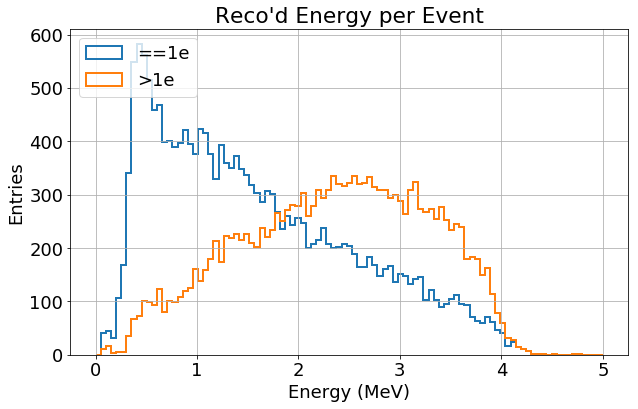

In [46]:
# print df_Event_tree_prod_electron['Event_Energy_total_MeV']
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,5,100)

plt.hist(df_charge_conversion_one['energy'].values,bins=BINS,histtype='step',lw=2,label='==1e')
plt.hist(df_charge_conversion_mul['energy'].values,bins=BINS,histtype='step',lw=2,label='>1e')

plt.title("Reco'd Energy per Event")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()
fig.savefig('Reco_electron_energy_per_event_mul_check.png', dpi=300)

#print(df_charge_conversion['energy'].shape[0])


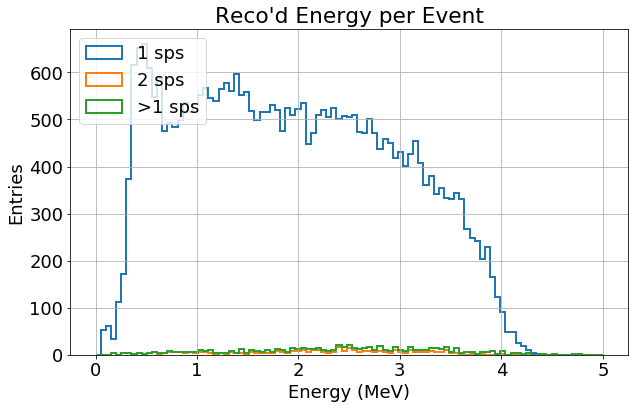

In [47]:
# print df_Event_tree_prod_electron['Event_Energy_total_MeV']
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,5,100)

plt.hist(df_charge_conversion_one_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='1 sps')
plt.hist(df_charge_conversion_two_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='2 sps')
plt.hist(df_charge_conversion_mul_sps['energy'].values,bins=BINS,histtype='step',lw=2,label='>1 sps')
plt.title("Reco'd Energy per Event")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()
fig.savefig('Reco_electron_energy_per_event_mul_sps_check.png', dpi=300)

#print(df_charge_conversion['energy'].shape[0])


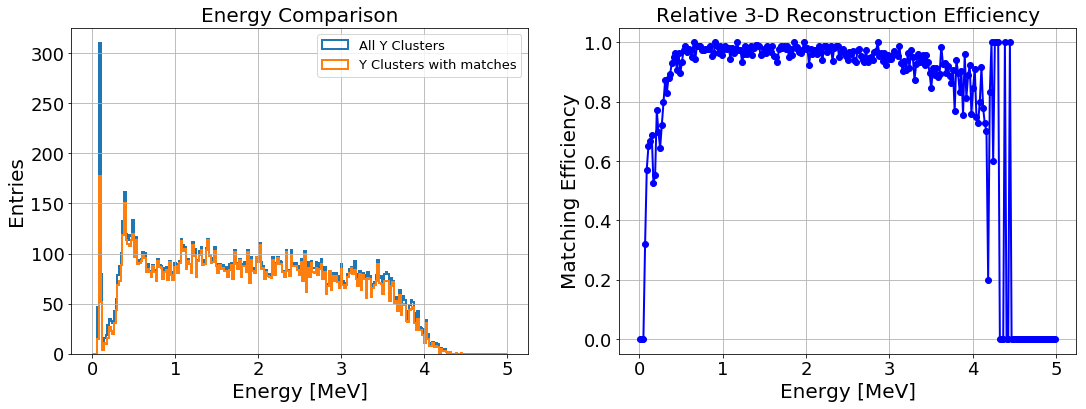

Minimum energy for any cluster on Y-Plane: 0.06686431877268507 MeV
Minimum energy for 3-D reco'd cluster on Y-Plane: 0.06723338777547491 MeV
maximum energy for any cluster on Y-Plane: 4.442213685841464 MeV
maximum energy for 3-D reco'd cluster on Y-Plane: 4.442213685841464 MeV
16375
15373


In [48]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,5,250)
plt.hist(dfcut_all_prod_electron['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_prod_electron['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0,5,250)

vals2D_prod_electron, bins2D_prod_electron = np.histogram(dfcut_all_prod_electron['energy'].values,bins=BINS)
vals3D_prod_electron, bins3D_prod_electron = np.histogram(dfcut_match_prod_electron['energy'].values,bins=BINS)
binC_prod_electron = 0.5*(bins2D_prod_electron[1:]+bins2D_prod_electron[:-1])
vals2D_prod_electron = vals2D_prod_electron.astype(float)
#print vals2D
vals3D_prod_electron = vals3D_prod_electron.astype(float)
ratio_v_prod_electron = []
for i,v in enumerate(vals2D_prod_electron):
    if (v == 0):
        ratio_v_prod_electron.append(0.)
    else:
        ratio_v_prod_electron.append(vals3D_prod_electron[i]/v)
#print ratio_v
plt.plot(binC_prod_electron,ratio_v_prod_electron,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('Relative 3-D Reconstruction Efficiency',fontsize=20)

plt.grid()
plt.show()
fig.savefig('relative_efficiency.png', dpi=300)
print "Minimum energy for any cluster on Y-Plane:", dfcut_all_prod_electron['energy'].min(), "MeV"
print "Minimum energy for 3-D reco'd cluster on Y-Plane:", dfcut_match_prod_electron['energy'].min(), "MeV"
print "maximum energy for any cluster on Y-Plane:", dfcut_all_prod_electron['energy'].max(), "MeV"
print "maximum energy for 3-D reco'd cluster on Y-Plane:", dfcut_match_prod_electron['energy'].max(), "MeV"
print dfcut_all_prod_electron['energy'].shape[0]
print dfcut_match_prod_electron['energy'].shape[0]

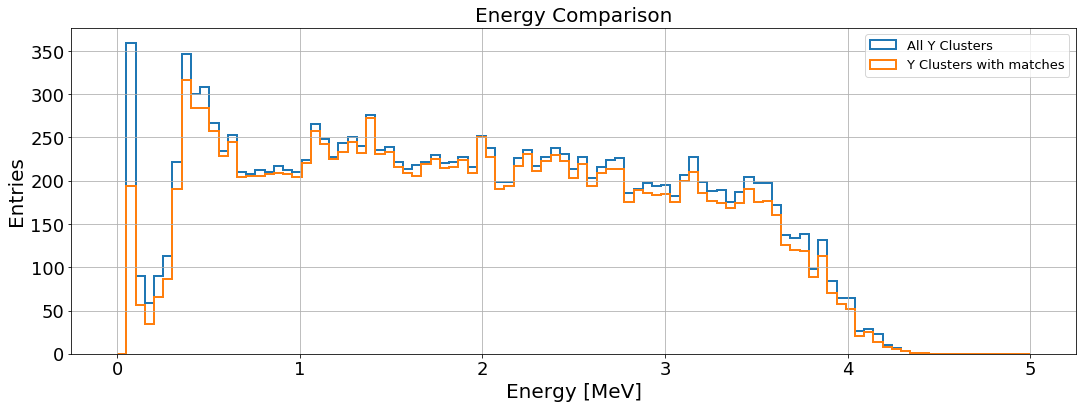

In [49]:
fig = plt.figure(figsize=(18,6))


BINS = np.linspace(0,5,100)
plt.hist(dfcut_all_prod_electron['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_prod_electron['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.show()

In [50]:
#print (df_Event_tree_prod_electron['Event_cluster_charge'].to_string())

In [51]:
#print (df_Event_tree_prod_electron['Event_Energy_100_MeV'].to_string())

In [52]:
print (len(dfcut_match_prod_electron['energy'].values))
print (len(df_Event_tree_prod_one_electron['Event_Energy_total_MeV'].values))
print (len(df_charge_conversion_one['energy'].values))
print (len(df_Event_tree_prod_grt_one_electron['Event_Energy_total_MeV'].values))
print (len(df_charge_conversion_mul['energy'].values))
print(len(df_Event_tree_prod_one_electron['Event_sps_ADC_Y'].values))
print(len(df_Event_tree_prod_grt_one_electron['Event_sps_ADC_Y'].values))

15373
30731
18861
19269
16438
30731
19269


In [53]:
# df_charge_conversion['Event_Energy_100_MeV']= 1000*df_charge_conversion['Event_Energy_100_MeV'].values
# print (df_Event_tree_prod_electron['Event_cluster_charge'].to_string())
print (df_charge_conversion_one['energy'].shape[0])
print (df_charge_conversion_one['Event_Energy_total_MeV'].shape[0])
print (df_charge_conversion_mul['energy'].shape[0])
print (df_charge_conversion_mul['Event_Energy_total_MeV'].shape[0])

18861
18861
16438
16438


In [54]:
#electron_mass=electron_mass MeV
# df_charge_conversion['energy']=df_charge_conversion['energy']+electron_mass
# df_sps_charge_conversion_Y['energy']=df_sps_charge_conversion_Y['energy']+electron_mass
# df_sps_charge_conversion_U['energy']=df_sps_charge_conversion_U['energy']+electron_mass

df_Event_tree_prod_electron['Event_Energy_total_pr'].shape[0]
df_charge_conversion['energy'].shape[0]

35299

In [55]:
#print (df_charge_conversion['energy'].to_string())

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


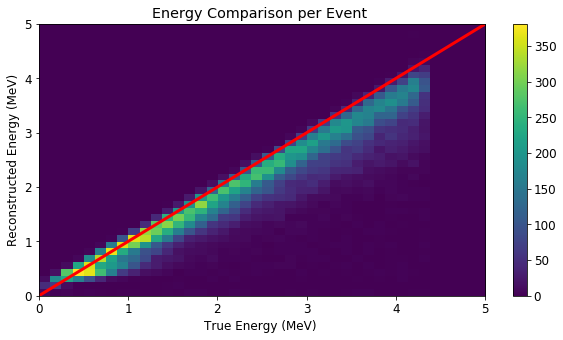

In [56]:
fig = plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12})
df_charge_conversion['Event_Energy_total_pr']=df_charge_conversion['Event_Energy_total_pr']-electron_mass

plt.hist2d(df_charge_conversion['Event_Energy_total_pr'].values,df_charge_conversion['energy'].values, bins=(40,40), range=[[0,5], [0,5]])#, norm=LogNorm())#,label='Truth v/s Reco')
plt.plot([-1, 5], [-1, 5], 'r-', lw=3)
plt.colorbar()
plt.xlabel('True Energy (MeV) ')
plt.ylabel('Reconstructed Energy (MeV)')
plt.title('Energy Comparison per Event ')

plt.show()
fig.savefig('energy_resolution_electron__check.png', dpi=500)

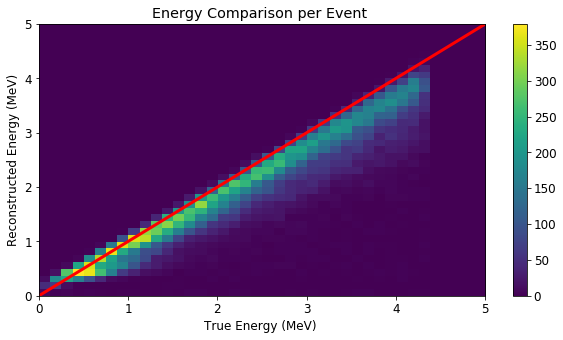

In [57]:
fig = plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12})
df_charge_conversion_one_sps['Event_Energy_total_pr']=df_charge_conversion_one_sps['Event_Energy_total_pr']-electron_mass

plt.hist2d(df_charge_conversion_one_sps['Event_Energy_total_pr'].values,df_charge_conversion_one_sps['energy'].values, bins=(40,40), range=[[0,5], [0,5]])#, norm=LogNorm())#,label='Truth v/s Reco')
plt.plot([-1, 5], [-1, 5], 'r-', lw=3)
plt.colorbar()
plt.xlabel('True Energy (MeV) ')
plt.ylabel('Reconstructed Energy (MeV)')
plt.title('Energy Comparison per Event ')

plt.show()
fig.savefig('energy_resolution_electron_primary_1sps_only_check.png', dpi=500)

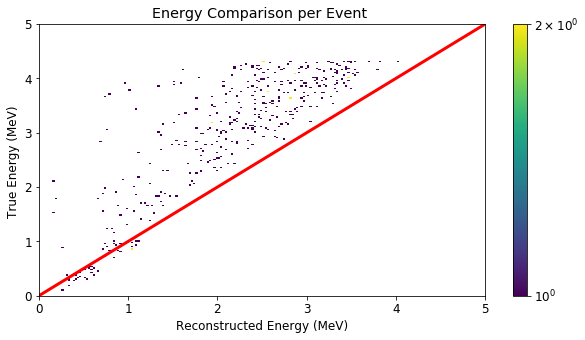

In [58]:
fig = plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12})
df_charge_conversion_two_sps['Event_Energy_total_pr']=df_charge_conversion_two_sps['Event_Energy_total_pr']-electron_mass

plt.hist2d(df_charge_conversion_two_sps['energy'].values,df_charge_conversion_two_sps['Event_Energy_total_pr'].values, bins=(200,200), range=[[0,5], [0,5]], norm=LogNorm())#,label='Truth v/s Reco')
plt.plot([-1, 5], [-1, 5], 'r-', lw=3)
plt.colorbar()
plt.ylabel('True Energy (MeV) ')
plt.xlabel('Reconstructed Energy (MeV)')
plt.title('Energy Comparison per Event ')

plt.show()
fig.savefig('energy_resolution_electron_primary_2sps_only_check.png', dpi=500)

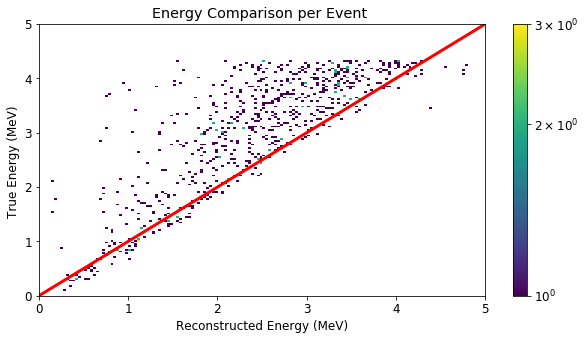

In [59]:
fig = plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12})
df_charge_conversion_mul_sps['Event_Energy_total_pr']=df_charge_conversion_mul_sps['Event_Energy_total_pr']-electron_mass

plt.hist2d(df_charge_conversion_mul_sps['energy'].values,df_charge_conversion_mul_sps['Event_Energy_total_pr'].values, bins=(150,150), range=[[0,5], [0,5]], norm=LogNorm())#,label='Truth v/s Reco')
plt.plot([-1, 5], [-1, 5], 'r-', lw=3)
plt.colorbar()
plt.ylabel('True Energy (MeV) ')
plt.xlabel('Reconstructed Energy (MeV)')
plt.title('Energy Comparison per Event ')

plt.show()
fig.savefig('energy_resolution_electron_primary_mul_sps_only_check.png', dpi=500)

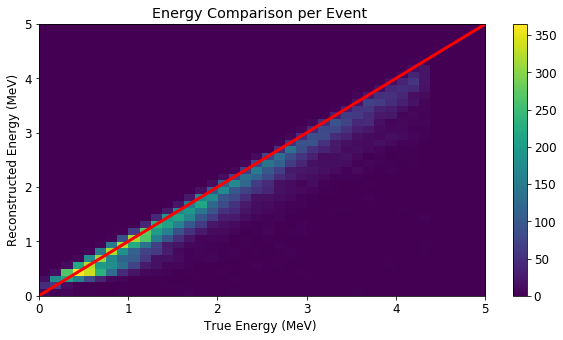

In [60]:
fig = plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12})
#plt.subplot(1, 2, 1)
plt.hist2d(df_charge_conversion_one['Event_Energy_total_MeV'].values,df_charge_conversion_one['energy'].values, bins=(40,40), range=[[0,5], [0,5]])#, norm=LogNorm())#,label='Truth v/s Reco')
plt.plot([-1, 5], [-1, 5], 'r-', lw=3)
plt.colorbar()
plt.xlabel('True Energy (MeV) ')
plt.ylabel('Reconstructed Energy (MeV)')
plt.title('Energy Comparison per Event ')
# plt.subplot(1, 2, 2)
# BINS = np.linspace(-1,4,1000)
# plt.hist((df_charge_conversion_one['Event_Energy_total_MeV']-df_charge_conversion_one['energy']).values,label='True - Reco',bins=BINS,histtype='step')
# plt.ylabel('Entries ')
# plt.xlabel('Energy Difference (MeV)')
# plt.title('Energy Comparison per Event')
# plt.legend(loc=1,fontsize=13)
plt.show()
fig.savefig('energy_resolution_electron_one_only_check.png', dpi=500)

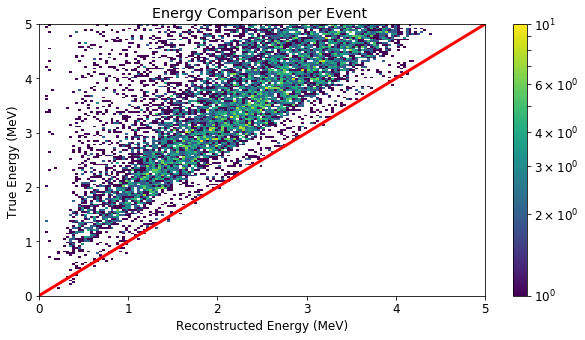

In [61]:
fig = plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12})
# plt.subplot(1, 2, 1)
plt.hist2d(df_charge_conversion_mul['energy'].values,df_charge_conversion_mul['Event_Energy_total_MeV'].values, bins=(150,150), range=[[0,5], [0,5]], norm=LogNorm())#,label='Truth v/s Reco')
plt.plot([-1, 5], [-1, 5], 'r-', lw=3)
plt.colorbar()
plt.ylabel('True Energy (MeV) ')
plt.xlabel('Reconstructed Energy (MeV)')
plt.title('Energy Comparison per Event ')
# plt.subplot(1, 2, 2)
# BINS = np.linspace(-1,4,1000)
# plt.hist((df_charge_conversion_mul['Event_Energy_total_MeV']-df_charge_conversion_mul['energy']).values,label='True - Reco',bins=BINS,histtype='step')
# plt.ylabel('Entries ')
# plt.xlabel('Energy Difference (MeV)')
# plt.title('Energy Comparison per Event')
# plt.legend(loc=1,fontsize=13)
plt.show()
fig.savefig('energy_resolution_electron_mul_only_check.png', dpi=500)

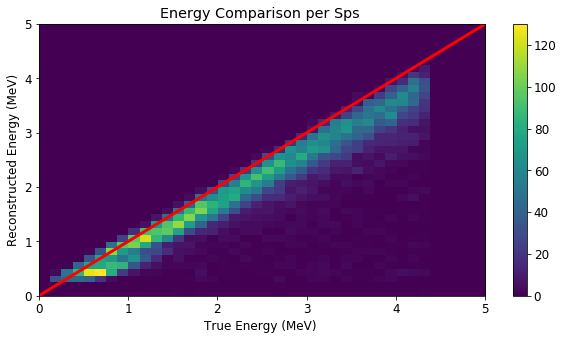

In [62]:
fig = plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12})
#plt.subplot(1, 2, 1)
plt.hist2d(df_sps_charge_conversion_Y['bktrkd_particle_energy_per_sps'].values,df_sps_charge_conversion_Y['energy'].values, bins=(40,40), range=[[0,5], [0,5]])#, norm=LogNorm())#,label='Truth v/s Reco')
plt.plot([-1, 5], [-1, 5], 'r-', lw=3)
plt.colorbar()
plt.xlabel('True Energy (MeV) ')
plt.ylabel('Reconstructed Energy (MeV)')
plt.title('Energy Comparison per Sps ')
# plt.subplot(1, 2, 2)
# BINS = np.linspace(-1,4,1000)
# plt.hist((df_sps_charge_conversion_Y['bktrkd_particle_energy_per_sps']-df_sps_charge_conversion_Y['energy']).values,label='True - Reco',bins=BINS,histtype='step')
# plt.ylabel('Entries ')
# plt.xlabel('Energy Difference (MeV)')
# plt.title('Energy Comparison per Sps')
# plt.legend(loc=1,fontsize=13)
plt.show()
fig.savefig('energy_resolution_electron_primary_only_bktrk_Y.png', dpi=500)

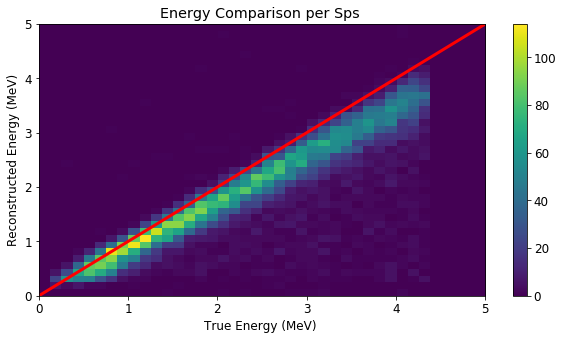

In [63]:
fig = plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12})
# plt.subplot(1, 2, 1)
plt.hist2d(df_sps_charge_conversion_U['bktrkd_particle_energy_per_sps'].values,df_sps_charge_conversion_U['energy'].values, bins=(40,40), range=[[0,5], [0,5]])#, norm=LogNorm())#,label='Truth v/s Reco')
plt.plot([-1, 5], [-1, 5], 'r-', lw=3)
plt.colorbar()
plt.xlabel('True Energy (MeV) ')
plt.ylabel('Reconstructed Energy (MeV)')
plt.title('Energy Comparison per Sps ')
# plt.subplot(1, 2, 2)
# BINS = np.linspace(-1,4,1000)
# plt.hist((df_sps_charge_conversion_U['bktrkd_particle_energy_per_sps']-df_sps_charge_conversion_U['energy']).values,label='True - Reco',bins=BINS,histtype='step')
# plt.ylabel('Entries ')
# plt.xlabel('Energy Difference (MeV)')
# plt.title('Energy Comparison per Sps')
# plt.legend(loc=1,fontsize=13)
plt.show()
fig.savefig('energy_resolution_electron_primary_only_bktrk_U.png', dpi=500)

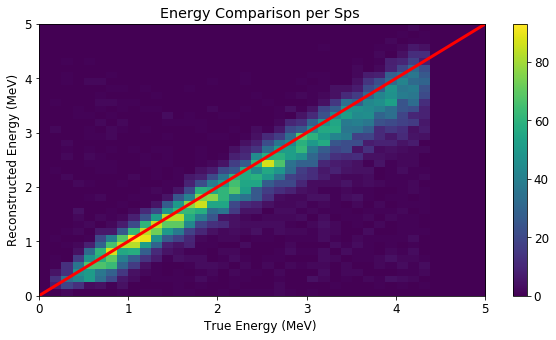

In [64]:
fig = plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12})
# plt.subplot(1, 2, 1)
plt.hist2d(df_sps_charge_conversion_V['bktrkd_particle_energy_per_sps'].values,df_sps_charge_conversion_V['energy'].values, bins=(40,40), range=[[0,5], [0,5]])#, norm=LogNorm())#,label='Truth v/s Reco')
plt.plot([-1, 5], [-1, 5], 'r-', lw=3)
plt.colorbar()
plt.xlabel('True Energy (MeV) ')
plt.ylabel('Reconstructed Energy (MeV)')
plt.title('Energy Comparison per Sps ')
# plt.subplot(1, 2, 2)
# BINS = np.linspace(-1,4,1000)
# plt.hist((df_sps_charge_conversion_U['bktrkd_particle_energy_per_sps']-df_sps_charge_conversion_U['energy']).values,label='True - Reco',bins=BINS,histtype='step')
# plt.ylabel('Entries ')
# plt.xlabel('Energy Difference (MeV)')
# plt.title('Energy Comparison per Sps')
# plt.legend(loc=1,fontsize=13)
plt.show()
fig.savefig('energy_resolution_electron_primary_only_bktrk_V.png', dpi=500)

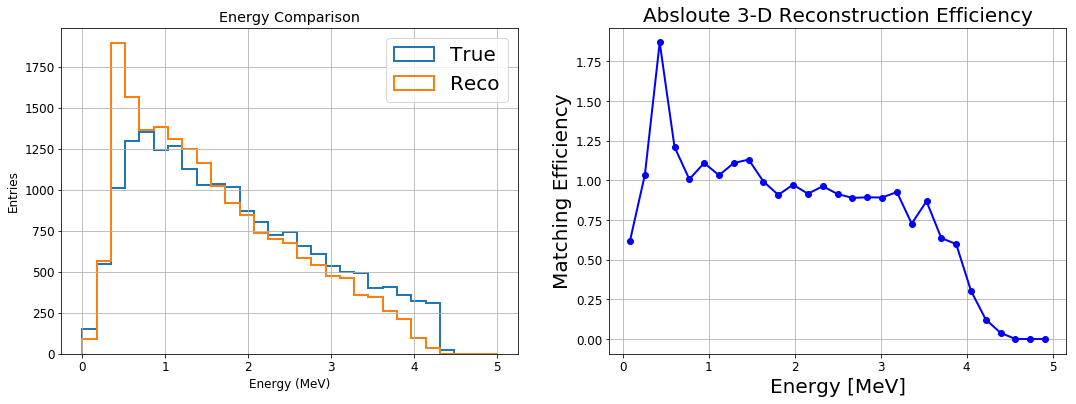

In [65]:
# print df_Event_tree_prod_electron['Event_Energy_total_MeV']
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,5,30)

plt.hist(df_charge_conversion_one['Event_Energy_total_MeV'].values,bins=BINS,histtype='step',lw=2,label='True')
plt.hist(df_charge_conversion_one['energy'].values,bins=BINS,histtype='step',lw=2,label='Reco')



plt.title("Energy Comparison")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=1,fontsize=20)

plt.subplot(1, 2, 2)
vals_true_prod_electron, bins_true_prod_electron = np.histogram(df_charge_conversion_one['Event_Energy_total_MeV'].values,bins=BINS)
vals_reco_prod_electron, bins_reco_prod_electron = np.histogram(df_charge_conversion_one['energy'].values,bins=BINS)
binC_prod_electron = 0.5*(bins_true_prod_electron[1:]+bins_true_prod_electron[:-1])
vals_true_prod_electron = vals_true_prod_electron.astype(float)
#print vals_true
vals_reco_prod_electron = vals_reco_prod_electron.astype(float)
ratio_v_prod_electron = []
for i,v in enumerate(vals_true_prod_electron):
    if (v == 0):
        ratio_v_prod_electron.append(0.)
    else:
        ratio_v_prod_electron.append(vals_reco_prod_electron[i]/v)
#print ratio_v
plt.plot(binC_prod_electron,ratio_v_prod_electron,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('Absloute 3-D Reconstruction Efficiency',fontsize=20)

plt.grid()

plt.show()
fig.savefig('absolute_efficiency.png', dpi=300)

In [66]:
# # print df_Event_tree_prod_electron['Event_Energy_total_MeV']
# fig = plt.figure(figsize=(10,6))
# BINS = np.linspace(0,5,100)

# plt.hist(df_sps_charge_conversion_Y['energy'].values,bins=BINS,histtype='step',lw=2,label='Reco Y')
# plt.hist(df_sps_charge_conversion_U['energy'].values,bins=BINS,histtype='step',lw=2,label='Reco U')

# plt.title("Reco'd Energy per SPS")
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Entries')
# plt.grid()
# plt.legend(loc=1)
# plt.show()



In [67]:
print df_Correlation_prod_electron_Sps.shape[0]
df_true_x=pd.DataFrame(np.random.randint(128,129,size=df_Correlation_prod_electron_Sps.shape[0]))
df_true_y=pd.DataFrame(np.random.randint(0,1,size=df_Correlation_prod_electron_Sps.shape[0]))
df_true_z=pd.DataFrame(np.random.randint(500,501,size=df_Correlation_prod_electron_Sps.shape[0]))

# print df_true_x.shape[0]
#print df_Correlation_prod_electron_Sps['sps_x'].to_string()
# df_true_x.describe()

36348


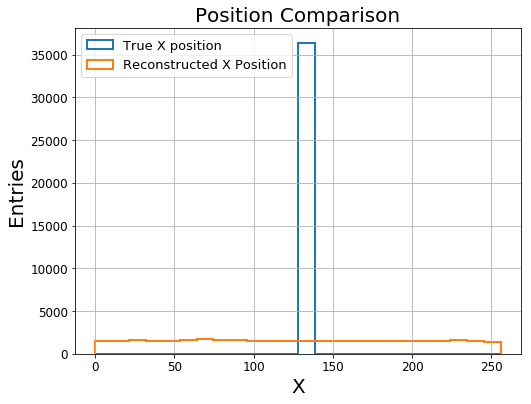

In [68]:
fig = plt.figure(figsize=(8,6))
# plt.subplot(1, 2, 1)
BINS = np.linspace(0,256,25)
plt.hist(df_true_x.values, bins=BINS,histtype='step',lw=2,label='True X position')
plt.hist(df_Correlation_prod_electron_Sps['sps_x'].values, bins=BINS,histtype='step',lw=2,label='Reconstructed X Position')
plt.xlabel("X",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Position Comparison',fontsize=20)
plt.legend(loc=2,fontsize=13)
plt.grid()
# plt.subplot(-10, 10, 100)
# plt.hist((df_true_x-df_Correlation_prod_electron_Sps['sps_x']).values, bins=BINS,histtype='step',lw=2)
# plt.xlabel("Difference",fontsize=20)
# plt.ylabel('Entries',fontsize=20)

# plt.legend(loc=1,fontsize=13)
# plt.grid()
plt.show()
fig.savefig('X-comparison_single_electron.png', dpi=300)

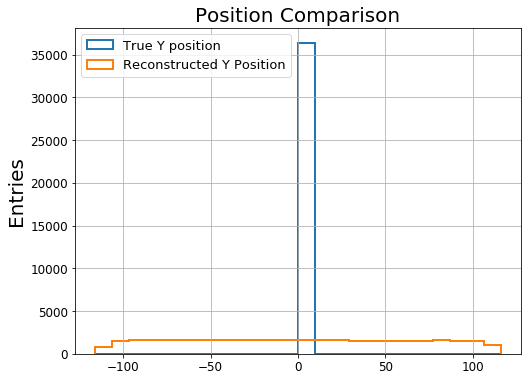

In [69]:
fig = plt.figure(figsize=(8,6))
# plt.subplot(1, 2, 1)
BINS = np.linspace(-116,116,25)
plt.hist(df_true_y.values, bins=BINS,histtype='step',lw=2,label='True Y position')
plt.hist(df_Correlation_prod_electron_Sps['sps_y'].values, bins=BINS,histtype='step',lw=2,label='Reconstructed Y Position')
plt.ylabel("y",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Position Comparison',fontsize=20)
plt.legend(loc=2,fontsize=13)
plt.grid()
# plt.subplot(-10, 10, 100)
# plt.hist((df_true_y-df_Correlation_prod_electron_Sps['sps_y']).values, bins=BINS,histtype='step',lw=2)
# plt.ylabel("Difference",fontsize=20)
# plt.ylabel('Entries',fontsize=20)

# plt.legend(loc=1,fontsize=13)
# plt.grid()
plt.show()
fig.savefig('y-comparison_single_electron.png', dpi=300)

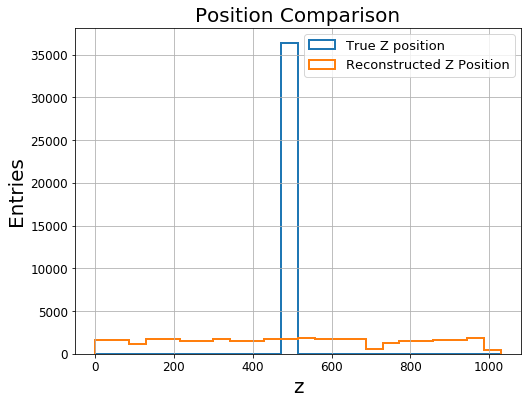

In [70]:
fig = plt.figure(figsize=(8,6))
# plt.subplot(1, 2, 1)
BINS = np.linspace(0,1030,25)
plt.hist(df_true_z.values, bins=BINS,histtype='step',lw=2,label='True Z position')
plt.hist(df_Correlation_prod_electron_Sps['sps_z'].values, bins=BINS,histtype='step',lw=2,label='Reconstructed Z Position')
plt.xlabel("z",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Position Comparison',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
# plt.subplot(-10, 10, 100)
# plt.hist((df_true_z-df_Correlation_prod_electron_Sps['sps_z']).values, bins=BINS,histtzpe='step',lw=2)
# plt.zlabel("Difference",fontsize=20)
# plt.zlabel('Entries',fontsize=20)

# plt.legend(loc=1,fontsize=13)
# plt.grid()
plt.show()
fig.savefig('z-comparison_single_electron.png', dpi=300)

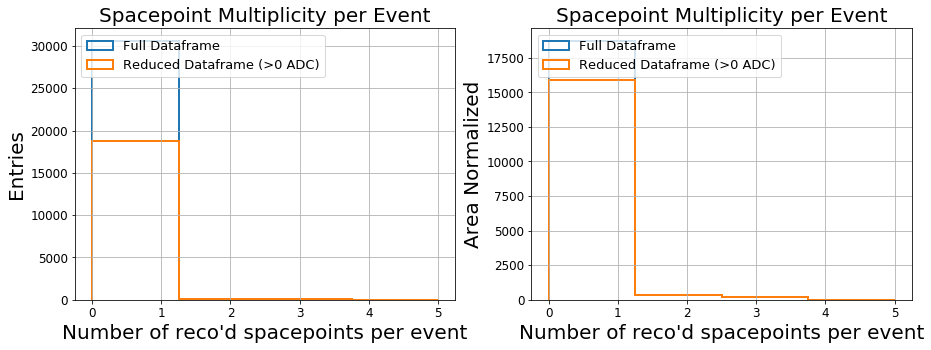

In [71]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
BINS = np.linspace(0,5,5)
plt.hist(df_Event_tree_prod_one_electron['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Full Dataframe')
plt.hist(df_charge_conversion_one['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reduced Dataframe (>0 ADC)')
plt.xlabel("Number of reco'd spacepoints per event",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Spacepoint Multiplicity per Event',fontsize=20)
plt.legend(loc=2,fontsize=13)
plt.grid()


plt.subplot(1, 2, 2)
BINS = np.linspace(0,5,5)
plt.hist(df_Event_tree_prod_grt_one_electron['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Full Dataframe')
plt.hist(df_charge_conversion_mul['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reduced Dataframe (>0 ADC)')
plt.xlabel("Number of reco'd spacepoints per event",fontsize=20)
plt.ylabel('Area Normalized',fontsize=20)
plt.title('Spacepoint Multiplicity per Event',fontsize=20)
plt.legend(loc=2,fontsize=13)
plt.grid()
plt.show()
fig.savefig('N_Sps.png', dpi=300)

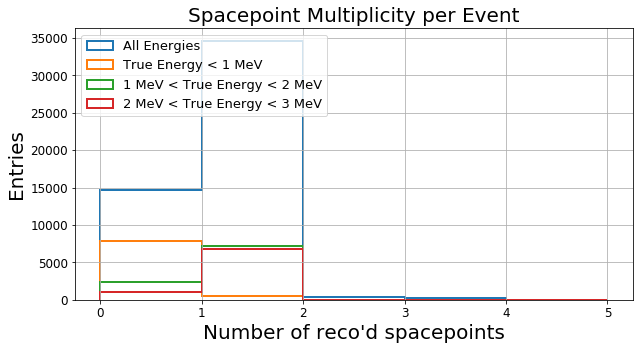

In [72]:
df_True_Energy_less_than_1 = df_Event_tree_prod_electron.query('Event_Energy_total_MeV < 1.') 
df_True_Energy_bw_1_and_2 = df_Event_tree_prod_electron.query('Event_Energy_total_MeV > 1. and Event_Energy_total_MeV < 2. ')
df_True_Energy_bw_2_and_3 = df_Event_tree_prod_electron.query('Event_Energy_total_MeV > 2. and Event_Energy_total_MeV < 3. ')

fig = plt.figure(figsize=(10,5))

BINS = np.linspace(0,5,6)
plt.hist(df_Event_tree_prod_electron['N_sps'].values, bins=BINS,histtype='step',lw=2,label='All Energies')
plt.hist(df_True_Energy_less_than_1['N_sps'].values, bins=BINS,histtype='step',lw=2,label='True Energy < 1 MeV')
plt.hist(df_True_Energy_bw_1_and_2['N_sps'].values, bins=BINS,histtype='step',lw=2,label='1 MeV < True Energy < 2 MeV')
plt.hist(df_True_Energy_bw_2_and_3['N_sps'].values, bins=BINS,histtype='step',lw=2,label='2 MeV < True Energy < 3 MeV')
# plt.hist(df_charge_conversion['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reduced Dataframe (>0 ADC)')
plt.xlabel("Number of reco'd spacepoints",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Spacepoint Multiplicity per Event',fontsize=20)
plt.legend(loc=2,fontsize=13)
plt.grid()

#plt.xticks(range(5))
plt.show()
fig.savefig('N_Sps_true_energy_function.png', dpi=300)

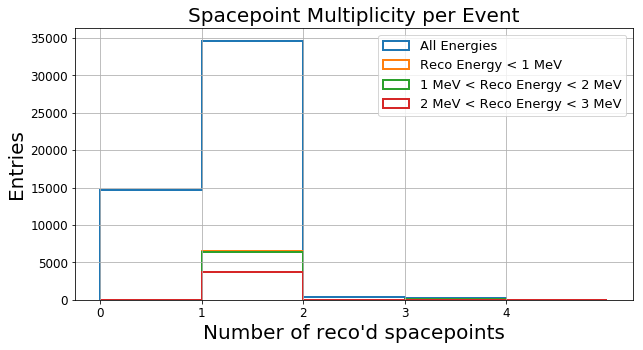

In [73]:

df_Reco_Energy_less_than_1 = df_charge_conversion_one.query('energy < 1.') 
df_Reco_Energy_bw_1_and_2 = df_charge_conversion_one.query('energy > 1. and energy < 2. ')
df_Reco_Energy_bw_2_and_3 = df_charge_conversion_one.query('energy > 2. and energy < 3. ')
fig = plt.figure(figsize=(10,5))

BINS = np.linspace(0,5,6)
plt.hist(df_Event_tree_prod_electron['N_sps'].values, bins=BINS,histtype='step',lw=2,label='All Energies')
plt.hist(df_Reco_Energy_less_than_1['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reco Energy < 1 MeV')
plt.hist(df_Reco_Energy_bw_1_and_2['N_sps'].values, bins=BINS,histtype='step',lw=2,label='1 MeV < Reco Energy < 2 MeV')
plt.hist(df_Reco_Energy_bw_2_and_3['N_sps'].values, bins=BINS,histtype='step',lw=2,label='2 MeV < Reco Energy < 3 MeV')
# plt.hist(df_charge_conversion['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reduced Dataframe (>0 ADC)')
plt.xlabel("Number of reco'd spacepoints",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Spacepoint Multiplicity per Event',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.xticks(range(5))
plt.show()
fig.savefig('N_Sps_recod_energy_function.png', dpi=300)

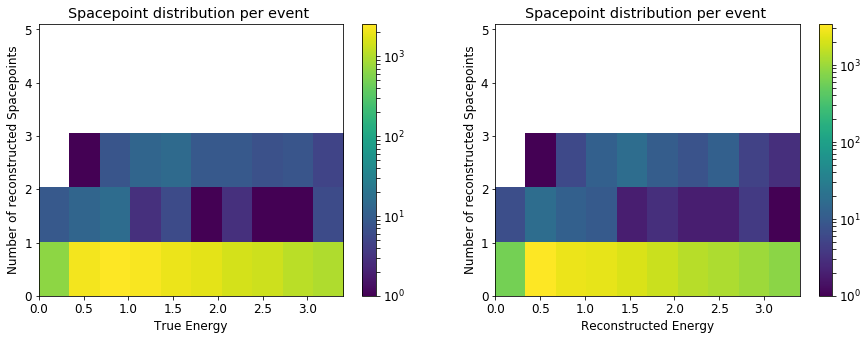

In [74]:
fig = plt.figure(figsize=(15,5))
plt.rcParams.update({'font.size': 12})
plt.subplot(1, 2, 1)
plt.hist2d(df_charge_conversion_one['Event_Energy_total_MeV'].values,df_charge_conversion_one['N_sps'].values, bins=(10,5), range=[[0,3.4], [0,5.1]], norm=LogNorm())
# plt.plot([0, 10], [0, 10], 'r-', lw=3)
plt.colorbar()
plt.ylabel('Number of reconstructed Spacepoints')
plt.xlabel('True Energy')
plt.title('Spacepoint distribution per event ')
plt.subplot(1, 2, 2)
plt.hist2d(df_charge_conversion_one['energy'].values,df_charge_conversion_one['N_sps'].values, bins=(10,5), range=[[0,3.4], [0,5.1]], norm=LogNorm())
# plt.plot([0, 10], [0, 10], 'r-', lw=3)
plt.colorbar()
plt.ylabel('Number of reconstructed Spacepoints')
plt.xlabel('Reconstructed Energy')
plt.title('Spacepoint distribution per event ')
plt.show()

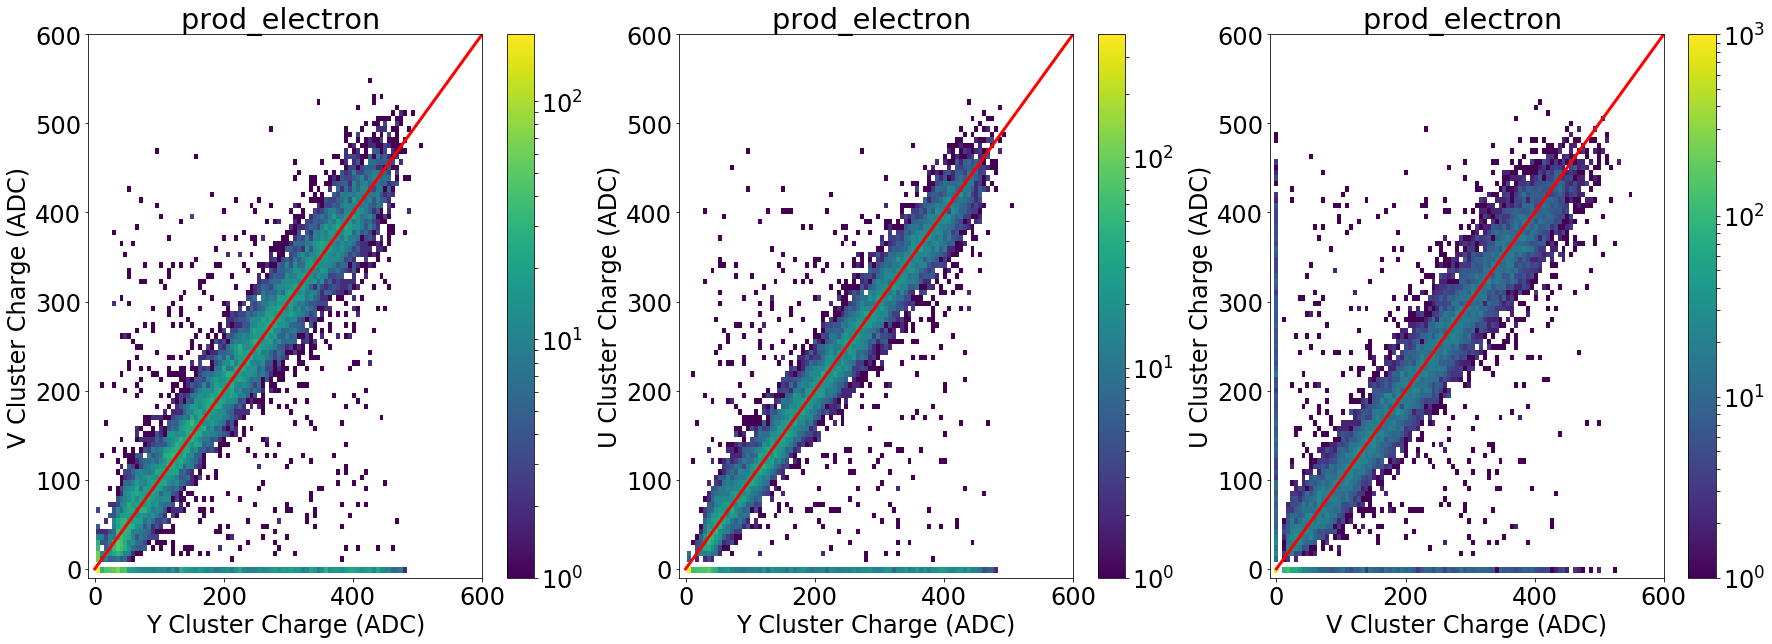

In [75]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_prod_electron['Y_cluster_charge'].values,df_Matching_prod_electron['V_cluster_charge'].values, bins=(100,100), range=[[-10,600], [-10,600]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('prod_electron ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_prod_electron['Y_cluster_charge'].values,df_Matching_prod_electron['U_cluster_charge'].values, bins=(100,100), range=[[-10,600], [-10,600]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('prod_electron ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_prod_electron['V_cluster_charge'].values,df_Matching_prod_electron['U_cluster_charge'].values, bins=(100,100), range=[[-10,600], [-10,600]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('prod_electron ')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

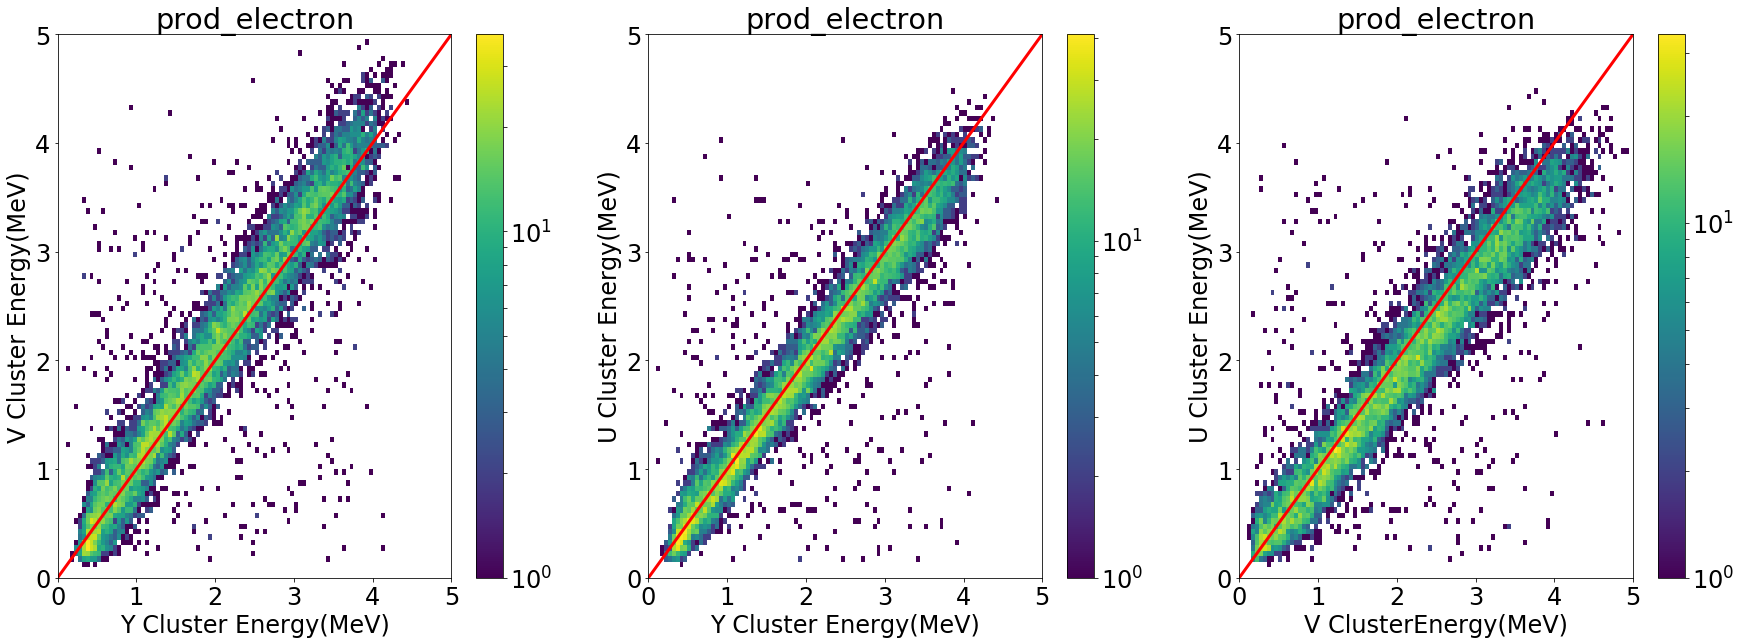

In [76]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge > 0.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge >0. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >0. '

dfChargeCut_prod_electron = df_Matching_prod_electron.query(CUT)

dfChargeCut_prod_electron['energyY_prod_electron'] = E_recoY_prod_electron(dfChargeCut_prod_electron,238.4)
dfChargeCut_prod_electron['energyU_prod_electron'] = E_recoU_prod_electron(dfChargeCut_prod_electron,232)
dfChargeCut_prod_electron['energyV_prod_electron'] = E_recoV_prod_electron(dfChargeCut_prod_electron,249)


EMAX = 5.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_prod_electron['energyY_prod_electron'].values,dfChargeCut_prod_electron['energyV_prod_electron'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('prod_electron')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_prod_electron['energyY_prod_electron'].values,dfChargeCut_prod_electron['energyU_prod_electron'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('prod_electron')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_prod_electron['energyV_prod_electron'].values,dfChargeCut_prod_electron['energyU_prod_electron'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('prod_electron')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27prod_electron